In [0]:
import numpy as np
import pandas as pd

## Get the Data

In [0]:
column_names = ['userID', 'Rcuisine']
user_df = pd.read_csv('/content/usercuisine.csv', names=column_names)
RC_df = pd.read_csv('/content/chefmozcuisine.csv')
RC = pd.read_csv('/content/geoplaces2.csv', encoding='latin-1')
rating_df=pd.read_csv('/content/rating_final.csv', encoding='latin-1')

In [0]:
user_df

,userID,Rcuisine
0,userID,Rcuisine
1,U1001,American
2,U1002,Mexican
3,U1003,Mexican
4,U1004,Bakery
...,...,...
326,U1135,Southern
327,U1135,Dessert-Ice_Cream
328,U1136,Mexican
329,U1137,Mexican


Now let's get the user ID:

In [0]:
user=input()
d={'userID': [user]}
df1 = pd.DataFrame(d)
df1.head()

U1004


,userID
0,U1004


We can merge them together:

In [0]:
user_df_merge = user_df.merge(df1, on='userID')
user_df_merge

,userID,Rcuisine
0,U1004,Bakery
1,U1004,Breakfast-Brunch
2,U1004,Japanese
3,U1004,Contemporary
4,U1004,Mexican
5,U1004,Bagels
6,U1004,Cafe-Coffee_Shop
7,U1004,Continental-European
8,U1004,Cafeteria


In [0]:
RC_df_merge = RC_df.merge(user_df_merge, on='Rcuisine')
RC_df_merge

,placeID,Rcuisine,userID
0,135106,Mexican,U1004
1,135104,Mexican,U1004
2,135102,Mexican,U1004
3,135101,Mexican,U1004
4,135100,Mexican,U1004
...,...,...,...
324,132392,Continental-European,U1004
325,132315,Continental-European,U1004
326,132182,Continental-European,U1004
327,132024,Continental-European,U1004


In [0]:
RC_merge = RC.merge(RC_df_merge, on='placeID')
RC_merge = RC_merge.drop(columns=['address','city','state','country','price','latitude','longitude','userID','the_geom_meter','Rambience','fax','zip','alcohol','smoking_area','dress_code','accessibility','url','Rambience','franchise','area','other_services'])
RC_merge

,placeID,name,popularity,Rcuisine
0,134999,Kiku Cuernavaca,150.437577,Japanese
1,132825,puesto de tacos,139.082615,Mexican
2,135106,El Rincón de San Francisco,107.376788,Mexican
3,132613,carnitas_mata,43.926995,Mexican
4,132732,Taqueria EL amigo,48.681969,Mexican
5,132875,shi ro ie,134.279229,Japanese
6,132668,TACOS EL GUERO,120.965743,Mexican
7,135053,La Fontana Pizza Restaurante and Cafe,78.530105,Cafeteria
8,135025,El Rincon de San Francisco,89.186492,Mexican
9,135030,Preambulo Wifi Zone Cafe,21.939663,Cafe-Coffee_Shop


In [0]:
RC_rating = rating_df.merge(RC_merge, on='placeID')
RC_rating

,userID,placeID,rating,food_rating,service_rating,name,popularity,Rcuisine
0,U1077,132825,7.6,5.7,5.8,puesto de tacos,139.082615,Mexican
1,U1055,132825,7.4,6.4,5.5,puesto de tacos,139.082615,Mexican
2,U1053,132825,6.3,6.7,5.0,puesto de tacos,139.082615,Mexican
3,U1081,132825,6.0,5.3,6.9,puesto de tacos,139.082615,Mexican
4,U1001,132825,5.2,5.7,6.0,puesto de tacos,139.082615,Mexican
...,...,...,...,...,...,...,...,...
422,U1061,132954,6.2,8.1,6.4,la parroquia,73.795050,Breakfast-Brunch
423,U1097,132954,5.6,6.8,8.0,la parroquia,73.795050,Breakfast-Brunch
424,U1128,132954,6.6,6.5,6.0,la parroquia,73.795050,Breakfast-Brunch
425,U1006,132954,6.9,6.9,6.4,la parroquia,73.795050,Breakfast-Brunch


In [0]:
RC_ = RC_rating.dropna(how='any')
RC_

,userID,placeID,rating,food_rating,service_rating,name,popularity,Rcuisine
0,U1077,132825,7.6,5.7,5.8,puesto de tacos,139.082615,Mexican
1,U1055,132825,7.4,6.4,5.5,puesto de tacos,139.082615,Mexican
2,U1053,132825,6.3,6.7,5.0,puesto de tacos,139.082615,Mexican
3,U1081,132825,6.0,5.3,6.9,puesto de tacos,139.082615,Mexican
4,U1001,132825,5.2,5.7,6.0,puesto de tacos,139.082615,Mexican
...,...,...,...,...,...,...,...,...
422,U1061,132954,6.2,8.1,6.4,la parroquia,73.795050,Breakfast-Brunch
423,U1097,132954,5.6,6.8,8.0,la parroquia,73.795050,Breakfast-Brunch
424,U1128,132954,6.6,6.5,6.0,la parroquia,73.795050,Breakfast-Brunch
425,U1006,132954,6.9,6.9,6.4,la parroquia,73.795050,Breakfast-Brunch


In [0]:
RC_ = RC_.drop_duplicates(subset='placeID',keep='first')
RC_=RC_.reset_index()
RC_

,index,userID,placeID,rating,food_rating,service_rating,name,popularity,Rcuisine
0,0,U1077,132825,7.6,5.7,5.8,puesto de tacos,139.082615,Mexican
1,32,U1068,135104,5.9,6.9,6.7,vips,90.237920,Mexican
2,39,U1068,132740,7.4,6.3,7.2,Carreton de Flautas y Migadas,44.041186,Mexican
3,47,U1068,132663,7.3,7.8,7.9,tacos abi,5.954334,Mexican
4,53,U1068,132732,7.4,6.2,7.6,Taqueria EL amigo,48.681969,Mexican
5,61,U1068,132630,5.7,5.8,5.7,palomo tec,27.082182,Mexican
6,67,U1067,132584,5.4,5.4,6.4,Gorditas Dona Tota,65.677399,Mexican
7,73,U1103,132613,7.1,6.5,6.0,carnitas_mata,43.926995,Mexican
8,79,U1044,135088,5.5,7.0,7.8,Cafeteria cenidet,56.758411,Cafeteria
9,85,U1070,132608,6.9,6.8,5.7,Hamburguesas La perica,51.872839,Mexican


In [0]:
rating = (RC_.groupby(by = ['placeID'])['rating'].count().reset_index().rename(columns = {'rating': 'rating_count'})[['placeID', 'rating_count']])
RC_rating = RC_.merge(rating, on='placeID')
RC_rating

,index,userID,placeID,rating,food_rating,service_rating,name,popularity,Rcuisine,rating_count
0,0,U1077,132825,7.6,5.7,5.8,puesto de tacos,139.082615,Mexican,1
1,32,U1068,135104,5.9,6.9,6.7,vips,90.237920,Mexican,1
2,39,U1068,132740,7.4,6.3,7.2,Carreton de Flautas y Migadas,44.041186,Mexican,1
3,47,U1068,132663,7.3,7.8,7.9,tacos abi,5.954334,Mexican,1
4,53,U1068,132732,7.4,6.2,7.6,Taqueria EL amigo,48.681969,Mexican,1
5,61,U1068,132630,5.7,5.8,5.7,palomo tec,27.082182,Mexican,1
6,67,U1067,132584,5.4,5.4,6.4,Gorditas Dona Tota,65.677399,Mexican,1
7,73,U1103,132613,7.1,6.5,6.0,carnitas_mata,43.926995,Mexican,1
8,79,U1044,135088,5.5,7.0,7.8,Cafeteria cenidet,56.758411,Cafeteria,1
9,85,U1070,132608,6.9,6.8,5.7,Hamburguesas La perica,51.872839,Mexican,1


In [0]:
v=RC_rating['rating_count']
R=RC_rating['rating']
C=RC_rating['rating'].mean()
m=RC_rating['rating_count'].quantile(0.20)

In [0]:
RC_rating['weighted_average']=((R*v)+ (C*m))/(v+m)
RC_rating[['placeID','name','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,rating_count,rating,weighted_average,popularity
0,132825,puesto de tacos,1,7.6,7.010227,139.082615
1,135104,vips,1,5.9,6.160227,90.237920
2,132740,Carreton de Flautas y Migadas,1,7.4,6.910227,44.041186
3,132663,tacos abi,1,7.3,6.860227,5.954334
4,132732,Taqueria EL amigo,1,7.4,6.910227,48.681969
5,132630,palomo tec,1,5.7,6.060227,27.082182
6,132584,Gorditas Dona Tota,1,5.4,5.910227,65.677399
7,132613,carnitas_mata,1,7.1,6.760227,43.926995
8,135088,Cafeteria cenidet,1,5.5,5.960227,56.758411
9,132608,Hamburguesas La perica,1,6.9,6.660227,51.872839


In [0]:
popularity=RC_rating.sort_values('popularity',ascending=False)
popularity.reset_index(inplace = True)
popularity[['placeID','name','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,rating_count,rating,weighted_average,popularity
0,132922,cafe punta del cielo,1,7.4,6.910227,724.247784
1,132773,El cotorreo,1,6.7,6.560227,203.734590
2,132715,tacos de la estacion,1,5.8,6.110227,167.583710
3,134999,Kiku Cuernavaca,1,7.3,6.860227,150.437577
4,132825,puesto de tacos,1,7.6,7.010227,139.082615
5,132875,shi ro ie,1,6.7,6.560227,134.279229
6,135055,la Cochinita Pibil Restaurante Yucateco,1,6.6,6.510227,125.114374
7,132668,TACOS EL GUERO,1,7.0,6.710227,120.965743
8,135032,Cafeteria y Restaurant El Pacifico,1,5.1,5.760227,115.040024
9,135106,El Rincón de San Francisco,1,6.0,6.210227,107.376788


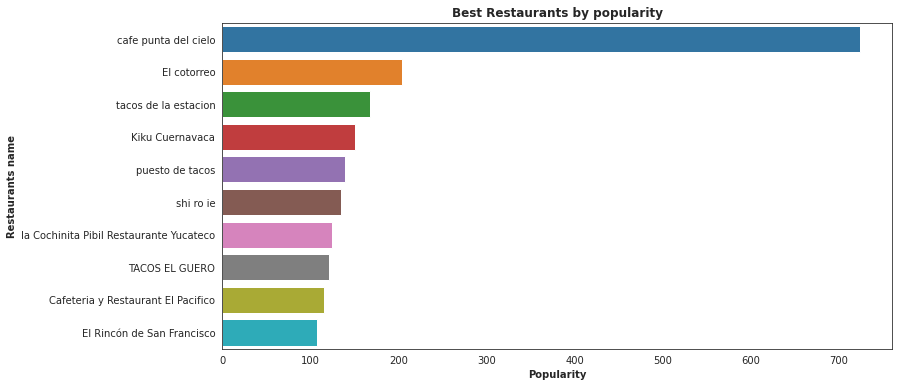

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['name'].head(10), data=popularity)
plt.title('Best Restaurants by popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Restaurants name', weight='bold')
plt.savefig('best_popularity.png')

In [0]:
Weighted_average=RC_rating.sort_values('weighted_average',ascending=False)
Weighted_average.reset_index(inplace = True)
Weighted_average[['placeID','name','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,rating_count,rating,weighted_average,popularity
0,135053,La Fontana Pizza Restaurante and Cafe,1,7.7,7.060227,78.530105
1,132572,Cafe Chaires,1,7.7,7.060227,67.263269
2,132825,puesto de tacos,1,7.6,7.010227,139.082615
3,132922,cafe punta del cielo,1,7.4,6.910227,724.247784
4,135028,La Virreina,1,7.4,6.910227,44.141021
5,132740,Carreton de Flautas y Migadas,1,7.4,6.910227,44.041186
6,132732,Taqueria EL amigo,1,7.4,6.910227,48.681969
7,132663,tacos abi,1,7.3,6.860227,5.954334
8,135072,Sushi Itto,1,7.3,6.860227,99.499595
9,134999,Kiku Cuernavaca,1,7.3,6.860227,150.437577


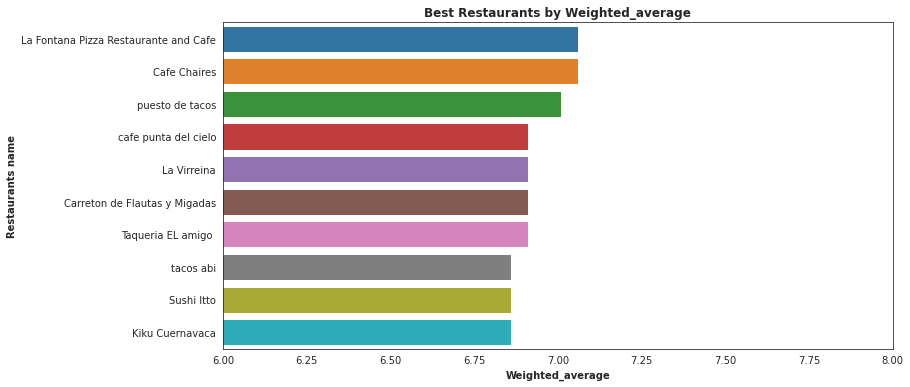

In [0]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=Weighted_average['weighted_average'].head(10), y=Weighted_average['name'].head(10), data=Weighted_average)
plt.xlim(6,8,0.1)
plt.title('Best Restaurants by Weighted_average', weight='bold')
plt.xlabel('Weighted_average', weight='bold')
plt.ylabel('Restaurants name', weight='bold')
plt.savefig('best_weighted_average.png')